In [1]:
import pandas as pd
import numpy as np
from classification import *

# Loading data
Your data should be loaded as .csv file containing such feature as 'pIC50' (column MUST BE named so) and also the set of descriptors which you want to use.

In [3]:
data = pd.read_csv('data_descriptors.csv', index_col=0)
data.head()

,molecule_chembl_id,Smiles,pIC50,bioactivity_class,mol,mr,logp,mw,balabanJ,bertzCT,tpsa,labuteASA,numHBA,numHBD
0,CHEMBL3404003,COCCCOc1cc(C(=O)N(C[C@@H]2CNC[C@H]2OC(=O)N(C)C...,7.523,1,<rdkit.Chem.rdchem.Mol object at 0x000002E58BA...,158.8702,4.4274,584.739,1.387979,1282.128385,102.46,245.075113,9,1
1,CHEMBL3403999,COCCCOc1cc(C(=O)N(C[C@@H]2CNC[C@H]2OC(=O)NCc2c...,7.046,1,<rdkit.Chem.rdchem.Mol object at 0x000002E58BF...,133.3309,3.0685,503.596,1.632150,964.452342,111.50,211.752852,8,2
2,CHEMBL4109808,COCCCOc1ccc([C@@H](C)N(C(=O)[C@H]2CNCCO2)C2CC2...,7.469,1,<rdkit.Chem.rdchem.Mol object at 0x000002E58BF...,121.3107,2.5576,450.576,1.732491,705.729893,78.49,191.027643,7,1
3,CHEMBL557193,CCCCNC(=O)[C@H](C)C[C@H](O)[C@@H](N)C[C@H](Cc1...,9.000,1,<rdkit.Chem.rdchem.Mol object at 0x000002E58BF...,144.5599,4.3678,517.151,0.000012,704.149228,103.04,218.434425,6,3
4,CHEMBL4114302,COC(=O)NCCCn1nc([C@@H](C)N(C(=O)[C@H]2CNCCO2)C...,8.444,1,<rdkit.Chem.rdchem.Mol object at 0x000002E58BF...,113.4454,1.2178,430.509,1.540630,921.730758,110.61,180.812111,8,2


# Choosing descriptors
To choose descriptors you can change list cols_we need, use names of descriptors like they are mentioned in your DataFrame.

In [4]:
cols_we_need = ['mr', 'logp', 'mw', 'bertzCT', 'tpsa', 'numHBA', 'numHBD']

# Descriptive statistics
This function counts max, min, mode, median and Shapiro-Wilk test's results for all choosen descriptors.

mr
Max: 333.4982000000005
Min: 26.5994
Mode: [154.5433]
Median: 146.4161999999998
Mean: 150.86467607305917
Shapiro-Wilk test: ShapiroResult(statistic=0.9517819881439209, pvalue=2.903263278412356e-26)
logp
Max: 9.076300000000002
Min: -1.918099999999992
Mode: [3.2935]
Median: 3.9786500000000027
Mean: 4.159972059360735
Shapiro-Wilk test: ShapiroResult(statistic=0.9625903964042664, pvalue=2.3077035576469685e-23)
mw
Max: 1219.6099999999994
Min: 97.11699999999998
Mode: [551.769]
Median: 535.4720000000003
Mean: 553.441874429224
Shapiro-Wilk test: ShapiroResult(statistic=0.9526662826538086, pvalue=4.792038490461264e-26)
bertzCT
Max: 2812.2904030981963
Min: 122.6360943641228
Mode: [889.44863449]
Median: 1150.5833745739692
Mean: 1167.3007388936696
Shapiro-Wilk test: ShapiroResult(statistic=0.960281491279602, pvalue=4.955484972648625e-24)
tpsa
Max: 397.43
Min: 15.27
Mode: [69.26]
Median: 91.93
Mean: 104.10808675799088
Shapiro-Wilk test: ShapiroResult(statistic=0.8935503363609314, pvalue=1.7831158

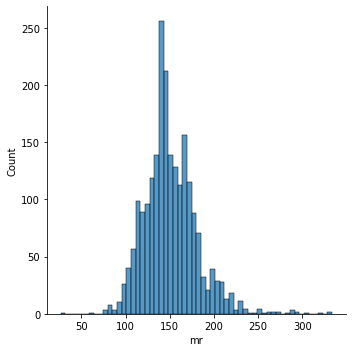

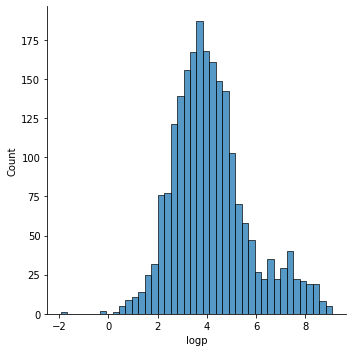

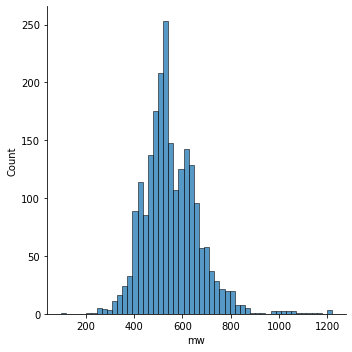

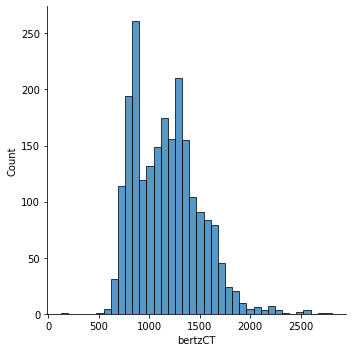

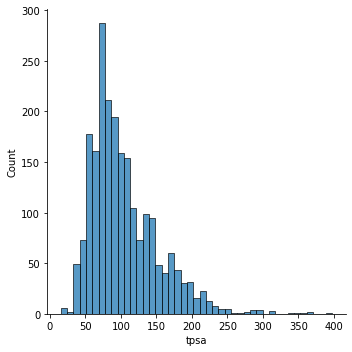

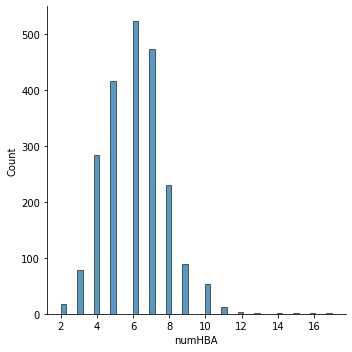

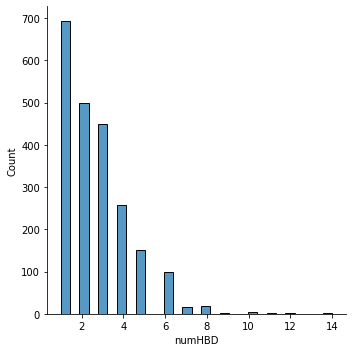

In [5]:
stats_data(data, cols_we_need)

# Correlation table
This function displays correlation coefficients within all descriptors.

In [6]:
cor_table(data, cols_we_need)

,mr,logp,mw,bertzCT,tpsa,numHBA,numHBD
mr,1.000000,0.255753,0.978543,0.711178,0.671694,0.609587,0.571185
logp,0.255753,1.000000,0.237950,0.357979,-0.423071,-0.411030,-0.372722
mw,0.978543,0.237950,1.000000,0.727502,0.686396,0.609306,0.582699
bertzCT,0.711178,0.357979,0.727502,1.000000,0.334741,0.313826,0.211547
tpsa,0.671694,-0.423071,0.686396,0.334741,1.000000,0.809697,0.906156
numHBA,0.609587,-0.411030,0.609306,0.313826,0.809697,1.000000,0.564286
numHBD,0.571185,-0.372722,0.582699,0.211547,0.906156,0.564286,1.000000


# Making test and train samples
This function splits your dataset into X_train, X_test, y_train, y_test samples and compares train and test samples by t-test (if your descriptors distribute normally choose "normal") or Mann-Whitney test (if your secriptors distribute abnormally choose "abnormal").

In [7]:
X_train, X_test, y_train, y_test = train_test(data, cols_we_need, "abnormal")

mr:
MannwhitneyuResult(statistic=498232.5, pvalue=0.346394179978035)
logp:
MannwhitneyuResult(statistic=488492.0, pvalue=0.13277696769586989)
mw:
MannwhitneyuResult(statistic=500513.5, pvalue=0.4102631984156703)
bertzCT:
MannwhitneyuResult(statistic=486396.0, pvalue=0.10241256919683278)
tpsa:
MannwhitneyuResult(statistic=488574.5, pvalue=0.13407717309926265)
numHBA:
MannwhitneyuResult(statistic=497675.5, pvalue=0.3285944902706579)
numHBD:
MannwhitneyuResult(statistic=480719.5, pvalue=0.0414479522747999)


# Building QSAR-model

# Choose algorithm from below:
- "random forest" : Random Forest Classifier
- "logistic_regression" : Logistic Regression
- "ridge_classifier" : Ridge Classifier
- "knn_classifier" : K-Nearest Neughbors
- "svm_classifier" : SVM
- "gbc_classifier" : Gradient Boosting Classifier
- "mlp_classifier" : MLP Classifier

In [8]:
algorithm = "knn_classifier"

# Choose threshold for bioactivity of your ligands
Choose such number of "pIC50" that will be threshold of activity of your molecules. Molecules that have pIC50 more than threshold will be considered as active, others - as inactive.

In [9]:
threshold = 8.0

# Choose hyperparameters for your model
ATTENTION: you will have to choose parameters only for algorithm you will work with, name of dictionary in the next code step must be the one that you will tune here for selected algorithm.

In [10]:
hyperparameters_rf = {'n_estimators' : [5, 10, 20, 50, 100, 200, 500, 800, 1000, 1500, 2000], 
              'max_depth' : [10, 20, 50, 100, 150, 250, 300, 350, 400, 450, 500, None], 
              'min_samples_split' : [2, 5, 10, 20],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf' : [1, 2, 4]}
hyperparameters_log_reg = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                           'penalty' : ['l2', 'l1', 'elasticnet', 'none'],
                           'C' : [100, 10, 1.0, 0.1, 0.01]} 
hyperparameters_ridge = {'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
hyperparameters_knn = {'n_neighbors' : range(1, 31),
                       'weights' : ['uniform', 'distance']}
hyperparameters_svm = {'kernel' : ['poly', 'rbf', 'sigmoid'],
                       'C' : [50, 10, 1.0, 0.1, 0.01]}
hyperparameters_gbc = {'learning_rate' : [0.001, 0.01, 0.1],
                       'n_estimators' : [10, 100, 1000],
                       'subsample' : [0.5, 0.7, 1.0],
                       'max_depth' : [3, 7, 9, 20, 30, 50, 100, 200]}
hyperparameters_mlp = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

# Start building classifier

In [11]:
clf = Classifier(X_train, X_test, y_train, y_test, algorithm, threshold, hyperparameters_knn)

Accuracy_test: 0.7229832572298326 
Accuracy_train: 0.9145466405740378 
Precision score: 0.7154696132596685 
Recall score: 0.7662721893491125 
F1-score: 0.74 
ROC-AUC-score: 0.7216940884049637


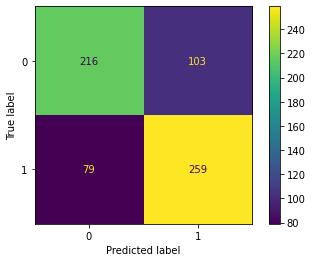

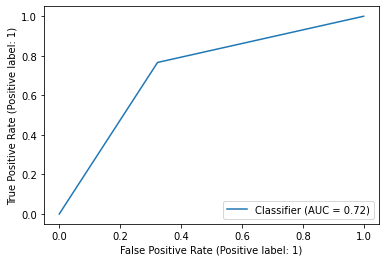

In [12]:
clf.model_building()

# Getting your model parameters

In [13]:
parameters = clf.model_parameters()

In [14]:
parameters

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 2,
 'weights': 'distance'}

# Getting model metrics

In [15]:
metrics = clf.metrics()

In [16]:
metrics

{'accuracy_train': 0.9145466405740378,
 'accuracy_test': 0.7229832572298326,
 'precision': 0.7154696132596685,
 'recall': 0.7662721893491125,
 'f1_score': 0.74,
 'roc_auc_score': 0.7216940884049637}